## Library import and version checking

In [1]:
import pandas as pd
from alts import check_version, alts_load, alts_plot, alts_filter

pd.set_option('display.float_format', '{:.5f}'.format)
check_version.print_versions()

Python Version: 3.9.6 (default, Feb  3 2024, 15:58:27) 
[Clang 15.0.0 (clang-1500.3.9.4)]

Pandas version: 1.5.2
NumPy version: 1.24.1
tkinter version: 8.5
Seaborn version: 0.12.1
Bokeh version: 3.0.3

#########  
Please ensure you have the following versions installed:
Pandas version: 1.5.2
NumPy version: 1.24.1
tkinter version: 8.5
Matplotlib version: 3.6.2
Seaborn version: 0.12.1
Bokeh version: 3.0.3
#########

To install these versions, you can use the following commands:
pip install pandas==1.5.2
pip install numpy==1.24.1
pip install matplotlib==3.6.2
pip install seaborn==0.12.1
pip install bokeh==3.0.3


## Load csv for A-tag data (atag=1 for 1 A-tag and atag=2 for 2 A-tag)

In [2]:
# dff = alts_load.alts_analysis(atag=1) # For 1 A-tag
dff, dfr = alts_load.alts_analysis(atag=2) #For 2 A-tags

#------         FRONT data loading completed    ------#
#------         REAR data loading completed     ------#
#------ FRONT and REAR Pulse Interval Completed ------#


In [3]:
dff.head(10)

,datetime,time,SPL1,SPL2,td,SPLR,datetime_next,PulseInterval
0,2022-04-22 08:27:28.089499904,30448.08950,154.97100,47.03100,0,3.29508,2022-04-22 08:27:28.090499840,0.00100
1,2022-04-22 08:27:28.090499840,30448.09050,249.03300,51.65700,0,4.82090,2022-04-22 08:27:28.091000064,0.00050
2,2022-04-22 08:27:28.091000064,30448.09100,199.68900,58.59600,0,3.40789,2022-04-22 08:27:28.091499776,0.00050
3,2022-04-22 08:27:28.091499776,30448.09150,190.43700,61.68000,0,3.08750,2022-04-22 08:27:28.092000000,0.00050
4,2022-04-22 08:27:28.092000000,30448.09200,270.62100,53.19900,0,5.08696,2022-04-22 08:27:28.092500224,0.00050
5,2022-04-22 08:27:28.092500224,30448.09250,196.60500,66.30600,0,2.96512,2022-04-22 08:27:28.092999936,0.00050
6,2022-04-22 08:27:28.092999936,30448.09300,345.40800,27.75600,0,12.44444,2022-04-22 08:27:28.093500160,0.00050
7,2022-04-22 08:27:28.093500160,30448.09350,316.11000,62.45100,0,5.06173,2022-04-22 08:27:28.093999872,0.00050
8,2022-04-22 08:27:28.093999872,30448.09400,249.03300,53.19900,0,4.68116,2022-04-22 08:27:28.094500096,0.00050
9,2022-04-22 08:27:28.094500096,30448.09450,287.58300,41.63400,0,6.90741,2022-04-22 08:27:28.094999808,0.00050


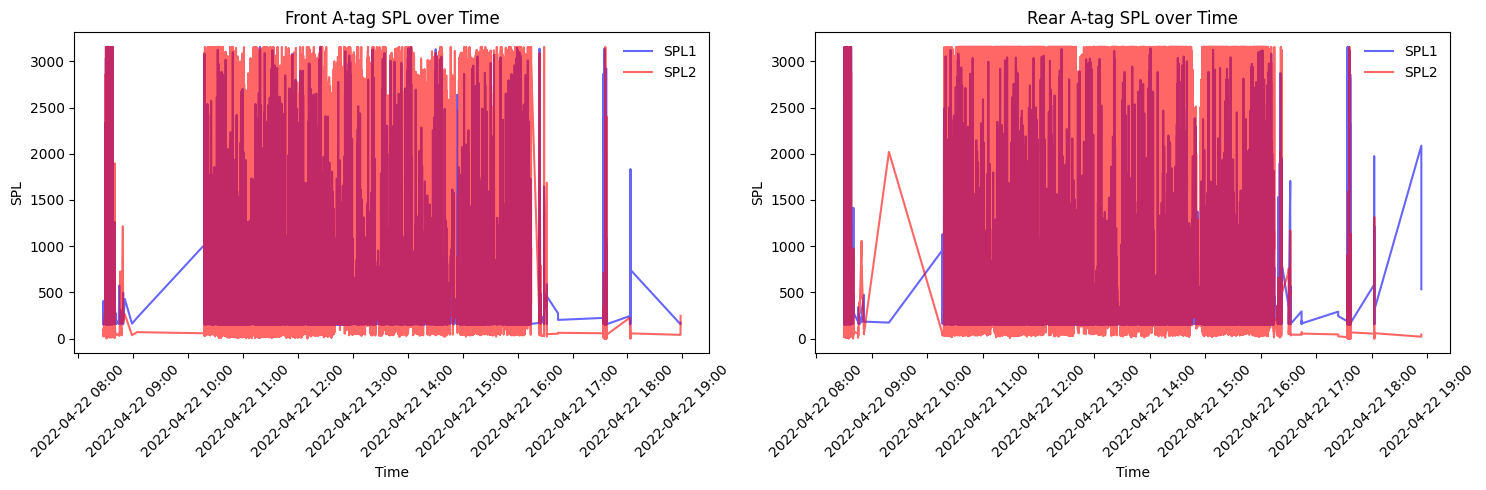

In [4]:
alts_plot.spl_time_plot(dff, dfr)

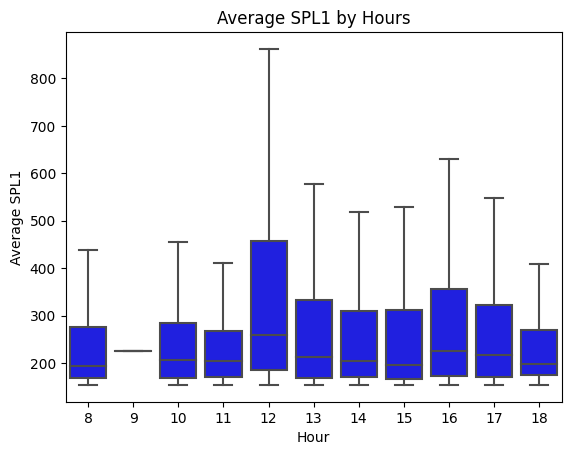

In [5]:
alts_plot.spl_time_distribution_plot(dff)

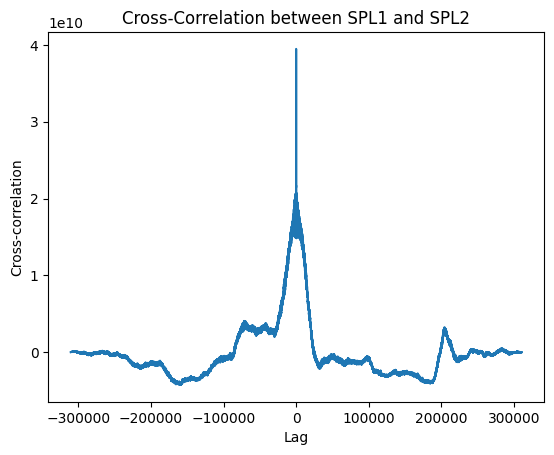

In [6]:
alts_plot.spl_cross_corr(dff)

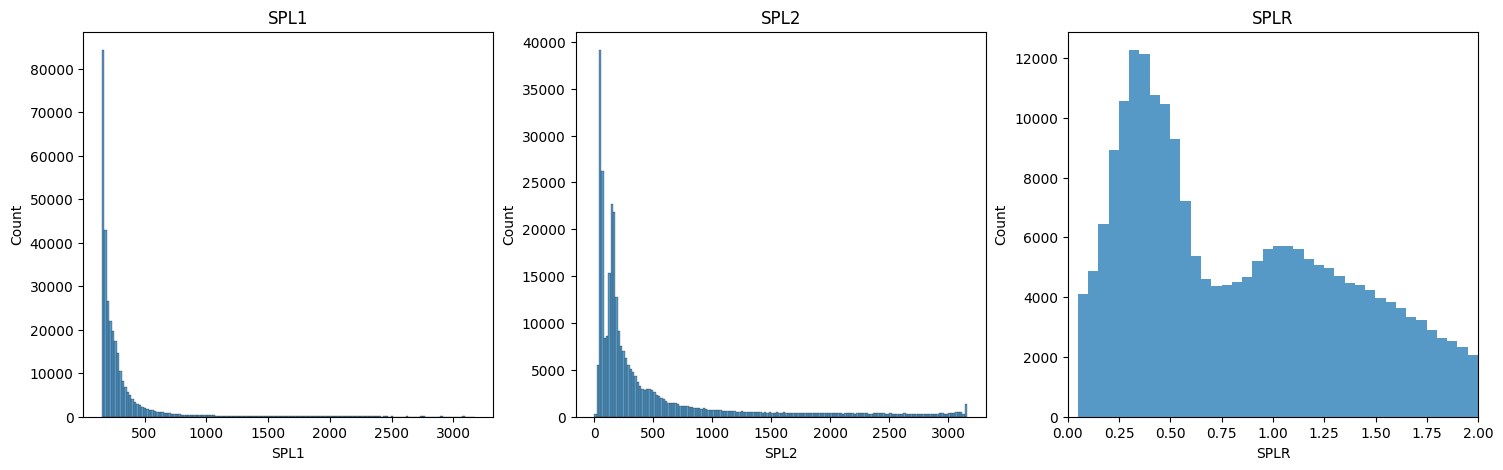

In [7]:
alts_plot.spl_distribution_plot(dff)

## Analysis Visualisation

In [7]:
alts_plot.plot_alts_result(dff=dff, dfr=dfr, time_diff=0, atag=2)

In [ ]:
# SPLthreshold, tdswitch, Reflection, Isolation, smoothwin, smoothSPL = alts_filter.filter_condition(noise_condition=2)
# dff = alts_filter.cleanup(dff, pos='front')
# dfr = alts_filter.cleanup(dfr, pos='rear')

In [3]:
noise_condition = '2'  # Change as needed
dff_cleaned = alts_filter.cleanup(dff, noise_condition)

Recommended for most cases with a mild filter
----------PULSE BY PULSE FILTERING----------
###--- 0th screening ---###
Exclude clicks without source direction information (td=+511 excluded)
Total number of pulses: 310347  ; remained after excluding time difference filter: 135185

###--- 1st screening ---###
Select clicks with sound pressure >= 43 counts. 1 count = 0.077 Pa approximately
Eliminated possible reflections associated within 0.5 ms after the previous pulse
Total number of pulses: 135185  ; remained after threshold and reflection filter: 115102

###--- 2nd screening ---###
Eliminated isolated pulses 1000.0 ms apart from both sides pulses
Total number of pulses: 115102  ; remained after isolated pulse filter: 108078

###--- 3rd screening ---###
Select clicks with smoothly changed inter-pulse intervals with R=< 3
where R=(IPI present)/(IPI previous).   Accept  1/smoothIPI < R < smoothIPI
Total number of pulses: 108078  ; remained after smoothing IPI: 58462

###--- 4th screening

In [4]:
dfr_cleaned = alts_filter.cleanup(dfr, noise_condition)

Recommended for most cases with a mild filter
----------PULSE BY PULSE FILTERING----------
###--- 0th screening ---###
Exclude clicks without source direction information (td=+511 excluded)
Total number of pulses: 343000  ; remained after excluding time difference filter: 111582

###--- 1st screening ---###
Select clicks with sound pressure >= 43 counts. 1 count = 0.077 Pa approximately
Eliminated possible reflections associated within 0.5 ms after the previous pulse
Total number of pulses: 111582  ; remained after threshold and reflection filter: 93456

###--- 2nd screening ---###
Eliminated isolated pulses 1000.0 ms apart from both sides pulses
Total number of pulses: 93456  ; remained after isolated pulse filter: 84960

###--- 3rd screening ---###
Select clicks with smoothly changed inter-pulse intervals with R=< 3
where R=(IPI present)/(IPI previous).   Accept  1/smoothIPI < R < smoothIPI
Total number of pulses: 84960  ; remained after smoothing IPI: 46908

###--- 4th screening ---

In [6]:
alts_plot.plot_alts_result(dff=dff_cleaned, dfr=dfr_cleaned, time_diff=0, atag=2)